# Data Analysis
Notebook overview:
- data loading
- visualization
- adding indicators

First we start off with exploring and analysing our data.

Using: pandas, numpy, seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import *

# NASDAQ

In [2]:
data_dir = '../data/'
nasdaq = pd.read_csv(data_dir + 'NASDAQ/Composite-2015-2019-D1.csv')

In [3]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1435150000
1,2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,4652.569824,1794470000
2,2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,4592.740234,2167320000
3,2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,4650.470215,1957950000
4,2015-01-08,4689.540039,4741.379883,4688.020020,4736.189941,4736.189941,2105450000


## Adj Close
According to Yahoo! Finance specification:
- *Close* -- Close price adjusted for splits.
- *Adj Close* -- Adjusted close price adjusted for both dividends and splits.

We can see that these two columns have exact same values. Let's check whether it is true for the whole dataset.

In [4]:
close = np.array(nasdaq['Adj Close'])
adj_close = np.array(nasdaq['Close'])

Not matching values:

In [5]:
len(nasdaq) - (close == adj_close).sum()

0

Drop unnecessary column

In [6]:
nasdaq.drop(['Adj Close'], axis=1, inplace=True)

In [7]:
nasdaq = nasdaq.set_index('Date')

In [8]:
nasdaq.index = pd.to_datetime(nasdaq.index)

In [9]:
nasdaq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,1435150000
2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,1794470000
2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,2167320000
2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,1957950000
2015-01-08,4689.540039,4741.379883,4688.020020,4736.189941,2105450000


# EURUSD

In [10]:
eurusd = load_file_split(data_dir + 'EURUSD/')

In [11]:
eurusd.tail()

,Date,Time,Open,High,Low,Close,Ticks
1458710,2019.11.29,16:54,1.10176,1.10202,1.10174,1.10200,0
1458711,2019.11.29,16:55,1.10199,1.10218,1.10149,1.10149,0
1458712,2019.11.29,16:56,1.10173,1.10174,1.10173,1.10173,0
1458713,2019.11.29,16:57,1.10173,1.10174,1.10173,1.10173,0
1458714,2019.11.29,16:58,1.10157,1.10174,1.10157,1.10158,0


Do we need Ticks column?

In [12]:
eurusd[eurusd['Ticks'] != 0]

,Date,Time,Open,High,Low,Close,Ticks


In [13]:
eurusd.drop(['Ticks'], axis=1, inplace=True)

In [14]:
eurusd.loc[:,'Date'] = eurusd.loc[:,'Date'] + ' ' + eurusd.loc[:,'Time']
eurusd.drop(['Time'], inplace=True, axis=1)
eurusd = eurusd.set_index('Date')

In [15]:
eurusd.index = pd.to_datetime(eurusd.index)

In [16]:
eurusd.head()

,Open,High,Low,Close
Date,,,,
2016-01-03 17:00:00,1.08701,1.08713,1.08701,1.08713
2016-01-03 17:01:00,1.08712,1.08712,1.08712,1.08712
2016-01-03 17:02:00,1.08708,1.08722,1.08708,1.08722
2016-01-03 17:03:00,1.08717,1.08723,1.08717,1.08723
2016-01-03 17:04:00,1.08718,1.08718,1.08711,1.08711


# Visualization & exploration
To easily plot financial history data `mplfinance` module will be needed.

In [17]:
!pip install mplfinance

fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline

## Volume
For NASDAQ we have access to Volume, which indicates the number of changed shares. This can be used as additional information holder.

In [19]:
nasdaq.loc[:, 'Volume'] = nasdaq.loc[:,'Volume'] / 1e9

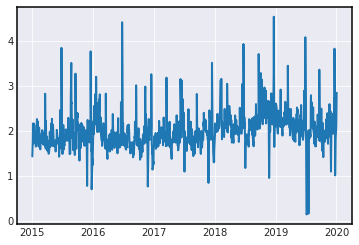

In [20]:
plt.plot(nasdaq.loc[:,'Volume'])

In [25]:
nasdaq.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999659,0.999461,0.999107,0.244668
High,0.999659,1.000000,0.999325,0.999510,0.250293
Low,0.999461,0.999325,1.000000,0.999624,0.232418
Close,0.999107,0.999510,0.999624,1.000000,0.239239
Volume,0.244668,0.250293,0.232418,0.239239,1.000000


# Full market data

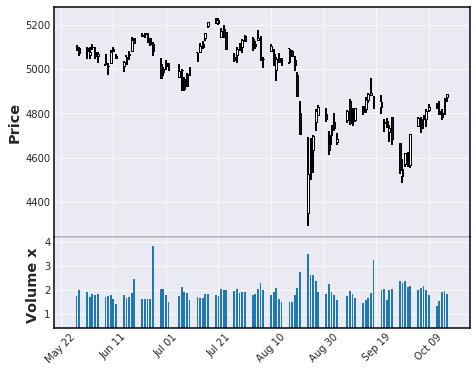

In [26]:
mpf.plot(nasdaq.iloc[100:200], type='candle', volume=True)

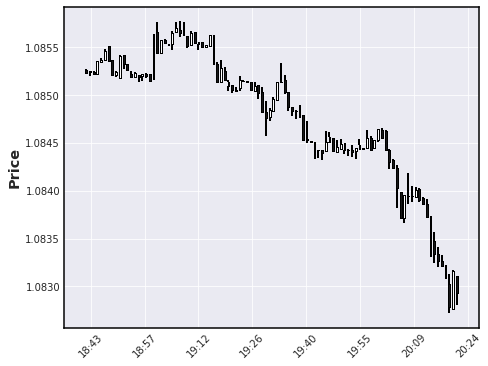

In [22]:
mpf.plot(eurusd.iloc[100:200], type='candle')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4478cfeba8>,
      dtype=object)

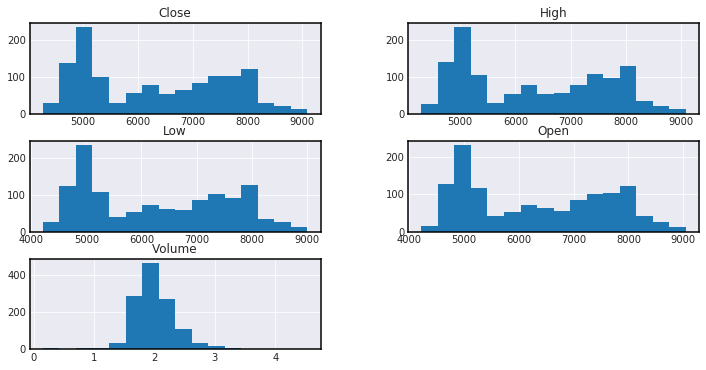

In [41]:
nasdaq.hist(figsize=(12,6), bins=16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4478bde240>,
      dtype=object)

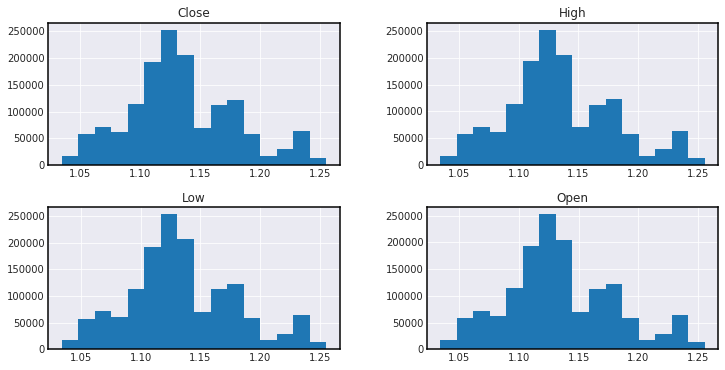

In [42]:
eurusd.hist(figsize=(12,6), bins=16)

# Simplified forecast
To make prediction problem easier, we will predict the close price only.

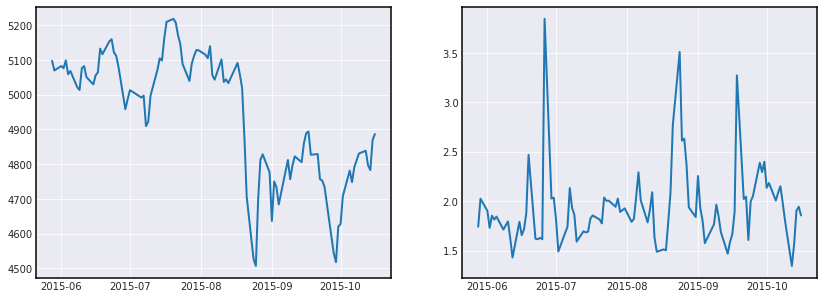

In [35]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(nasdaq.iloc[100:200,3])
plt.subplot(122)
plt.plot(nasdaq.iloc[100:200,4])

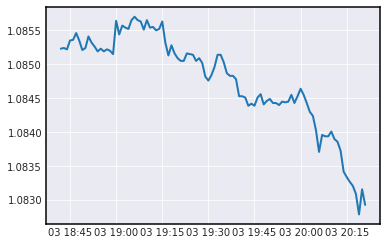

In [24]:
plt.plot(eurusd.iloc[100:200,3])

# Normalization
Here we will compare different normalization approaches:

Trainable:
- Convolution
- Batch normalization

Constant:
- Moving Average